In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 6.0]

import okama as ok

## Get information about a single asset

You can start with getting general information about a single asset / index.

In [2]:
one_asset = ok.Asset('VOO.US')
one_asset

symbol                             VOO.US
name                 Vanguard S&P 500 ETF
country                               USA
exchange                        NYSE ARCA
currency                              USD
type                                  ETF
first date                        2010-10
last date                         2020-11
period length (Y)                   10.10
dtype: object

In [3]:
# live (20 min delay) price
one_asset.price

327.32

In [4]:
#dividends history
one_asset.dividends.tail(10)

Date
2018-06-28    1.1573
2018-09-26    1.2067
2018-12-17    1.2890
2019-03-21    1.4551
2019-06-27    1.3859
2019-09-26    1.3014
2019-12-23    1.4285
2020-03-10    1.1780
2020-06-29    1.4333
2020-09-29    1.3085
Freq: D, Name: VOO.US, dtype: float64

If you doubt about ticker availability or asset name, check it with _search_:

In [5]:
ok.search('exxon')

[['XOM.US',
  'XOM',
  'Exxon Mobil Corporation',
  'USA',
  'NYSE',
  'USD',
  'Common Stock'],
 ['XONA.XETR',
  'XONA',
  'Exxon Mobil Corporation',
  'Germany',
  'XETR',
  'EUR',
  'Common Stock']]

In [6]:
# available namespaces
ok.namespaces

{'US': 'US Stock Exchanges and mutual funds',
 'XETR': 'Frankfurt Stock Exchange',
 'MOEX': 'Moscow Exchange',
 'PIF': 'Russian mutual funds',
 'FX': 'FOREX currency market',
 'INDX': 'Indexes',
 'COMM': 'Commodities prices',
 'RE': 'Real estate prices',
 'INFL': 'Inflation',
 'RATE': 'Bank deposit rates'}

## Compare several assets from different stock markets. Get the currency adjusted perfomance

In [7]:
ls = ['SPY.US', 'BND.US', 'GC.COMM', 'EUR.FX']
currency = 'EUR'

In [8]:
x = ok.AssetList(ls, curr=currency, last_date='2020-01')  # first_date and last_date limits the Rate of Return time series
x

symbols              [SPY.US, BND.US, GC.COMM, EUR.FX]
currency                                           EUR
first date                                     2007-05
last_date                                      2020-01
period length (Y)                                 12.7
inflation                                     EUR.INFL
dtype: object

In [9]:
x.names

{'SPY.US': 'SPDR S&P 500 ETF Trust',
 'BND.US': 'Vanguard Total Bond Market Index Fund ETF Shares',
 'GC.COMM': 'Gold',
 'EUR.FX': 'EUR'}

lets see the accumulated return and comapare it with the inflation.

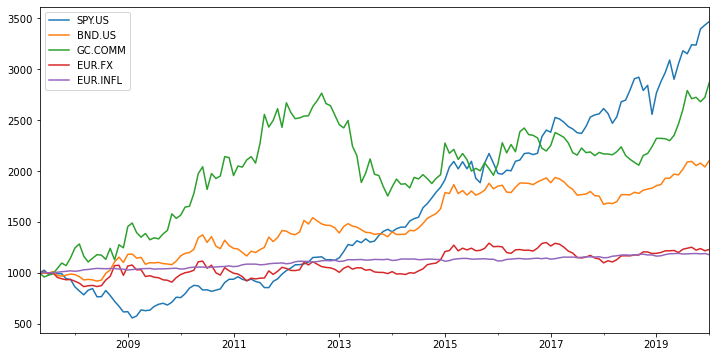

In [10]:
x.wealth_indexes.plot();

Drawdowns history is availably and easy to see

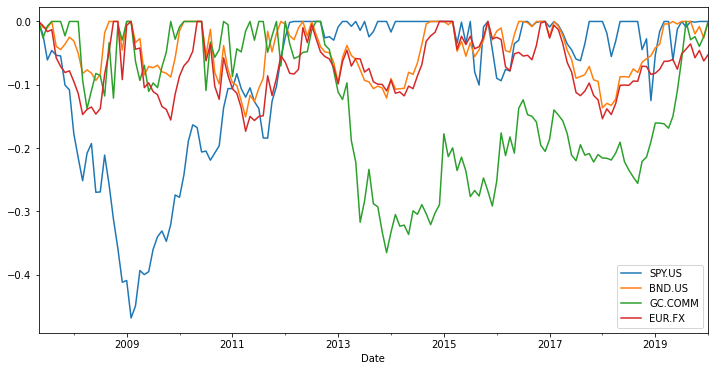

In [11]:
x.drawdowns.plot();

See the dividend yield history for all the assets in the list.

In [12]:
x.dividend_yield

,SPY.US,BND.US,GC.COMM,EUR.FX
2007-05,0.000000,0.001699,0.0,0.0
2007-05,0.000000,0.001699,0.0,0.0
2007-05,0.000000,0.001699,0.0,0.0
2007-05,0.000000,0.001699,0.0,0.0
2007-05,0.000000,0.001699,0.0,0.0
...,...,...,...,...
2020-01,0.017463,0.026664,0.0,0.0
2020-01,0.017463,0.026664,0.0,0.0
2020-01,0.017463,0.026664,0.0,0.0
2020-01,0.017463,0.026664,0.0,0.0


... or plot the same results

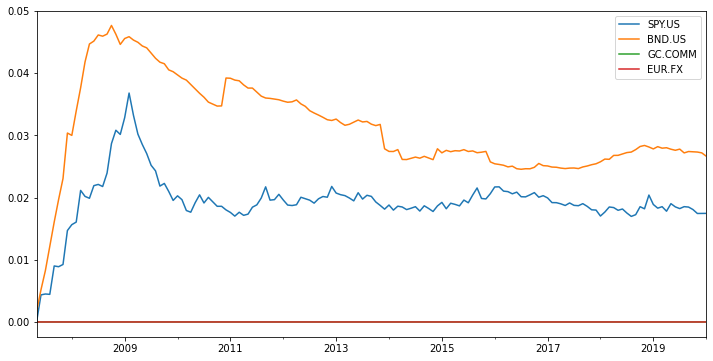

In [13]:
x.dividend_yield.plot();

_describe_ method shows all the main parameters (risk metrics, rate of return etc.) for the list of assets.

In [14]:
x.describe(years=[1, 10])  # You can specifie the period or leave the default: 1, 5 and 10 years

,property,period,BND.US,EUR.FX,GC.COMM,SPY.US,inflation
0,Compound return,YTD,0.0307119,0.0107,0.0536547,0.0102957,-0.01
1,CAGR,1 years,0.132887,0.0319925,0.236526,0.253479,0.0119145
2,CAGR,10 years,0.0605967,0.0225434,0.0624161,0.164254,0.0128024
3,CAGR,12.7 years,0.0599965,0.0163635,0.0861623,0.10241,0.0129399
4,Dividend yield,LTM,0.0266639,0,0,0.0174628,NaN
5,Risk,12.7 years,0.107611,0.105235,0.191243,0.150574,NaN
6,CVAR,12.7 years,0.049936,0.0582125,0.0924054,0.0846775,NaN
7,Max drawdowns,12.7 years,-0.150839,-0.173337,-0.365001,-0.46816,NaN
8,Max drawdowns dates,12.7 years,2011-04,2011-04,2013-12,2009-02,NaN
9,Inception date,None,2007-05,2000-01,2000-09,1993-02,2007-05


## Basic portfolio methods

Lets create a portfolio with 3 assets and base currency USD. We need to specify weigts.

In [15]:
tickers = ['VNQ.US', 'DBXD.XETR', 'MCFTR.INDX']  # we can create lists of assets and portfolio containing general type of assets and **indexes**
w = [0.5, 0.25, 0.25]
currency = 'USD'

In [16]:
y = ok.Portfolio(tickers, curr=currency, weights=w)
y

symbols              [VNQ.US, DBXD.XETR, MCFTR.INDX]
weights                            [0.5, 0.25, 0.25]
currency                                         USD
first date                                   2007-02
last_date                                    2020-09
period length (Y)                               13.6
dtype: object

In [17]:
y.table

,asset name,ticker,weights
0,Vanguard Real Estate Index Fund ETF Shares,VNQ.US,0.50
1,Xtrackers DAX UCITS ETF 1C,DBXD.XETR,0.25
2,MOEX Total Return,MCFTR.INDX,0.25


Portfolio has the same property _wealth_index_ (accumulated return) as AssetList objects.

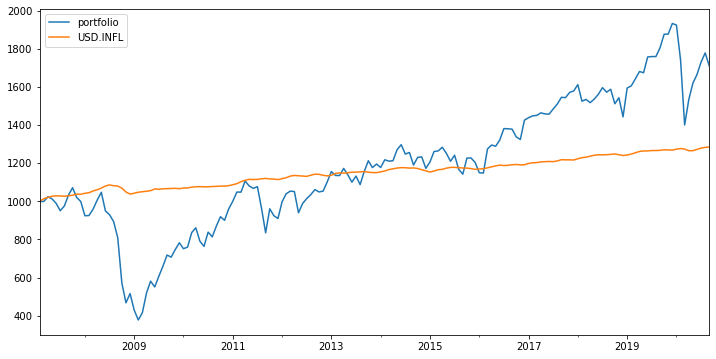

In [18]:
y.wealth_index.plot();

### Basic Portfolio risk metrics

You can use risk(volatility or std), semideviation, max drawdown, var and cvar metrics.

In [19]:
y.risk_annual

0.23034521293180124

In [20]:
y.semideviation_annual

0.18357592881461463

In [21]:
y.get_var_historic(level=1)

0.5541221032700834

In [22]:
y.get_cvar_historic(level=5)

0.5149421637274807

In [23]:
y.drawdowns.min()

-0.6482537878426401

_describe_ shows main properties for the portfolio for different trailing periods.

In [24]:
y.describe()

,property,rebalancing,period,portfolio,inflation
0,compound return,Not rebalanced,YTD,-0.114807,0.012912
1,CAGR,1 year,1 years,-0.0507592,0.013821
2,CAGR,1 year,5 years,0.0856641,0.018128
3,CAGR,1 year,10 years,0.0733446,0.017696
4,CAGR,1 year,13.6 years,0.0463835,0.018568
5,CAGR,1 month,13.6 years,0.0401097,0.018568
6,CAGR,Not rebalanced,13.6 years,0.0314812,0.018568
7,Risk,1 month,13.6 years,0.230345,NaN
8,CVAR,1 month,13.6 years,0.514942,NaN
9,Max drawdown,1 month,13.6 years,-0.648254,NaN


### Forecasting portfolio return

Monte Carlo forecast for normal distrubution

In [25]:
wealth = y.wealth_index
mc = y.forecast_monte_carlo_norm_wealth_indexes()

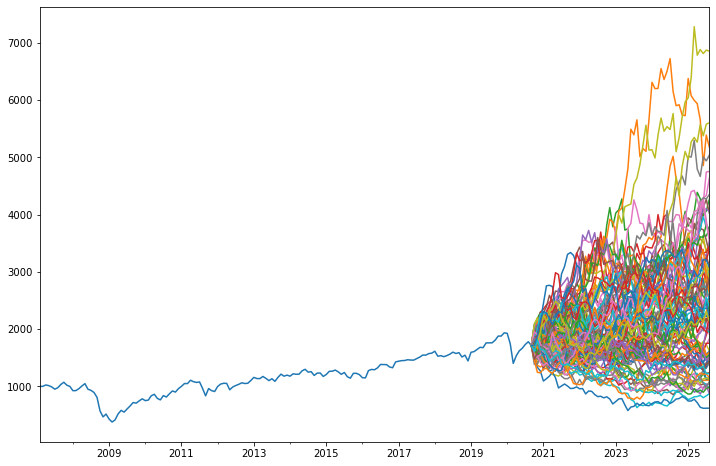

In [26]:
plt.figure(figsize=(12,8))
wealth['portfolio'].plot(legend=None)
for n in mc:
    mc[n].plot(legend=None)

For normal distribution it's easy to see forecasted accumulated return for a given set of percentiles.

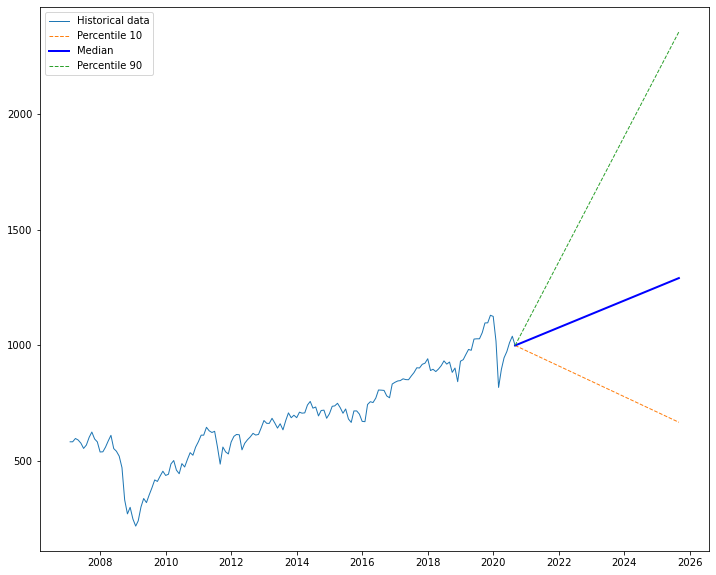

In [27]:
fig = plt.figure(figsize=(12,10))
ok.PlotPortfolio(symbols=tickers, weights=w, curr=currency).plot_forecast(years=5, today_value=1000, percentiles=[10,50,90]);